# Welcome to Jupyter!

In [7]:
import cmath
import math
import numpy
import pandas as pd
import matplotlib.pyplot as plt
# Data
R1 = 4.10
R2 = 6.90
X1 = 5.70
X2 = 5.70
Xm = 117.0

# Volt
V = 220
# Frequency 
f = 50
# poles
p = 4
# losses
Piron = 35
Ps = 16.5

# data Sheet Used for Generate CSV File
data_Sheet = {
      's':  [],'N':[],'Zf': [],'Zb': [],'Zin':[],'I1': [],'pf': [],'Pin': [],'Pm': [],'Pcu': [],'T': [],'ng': []
    }

df = pd.DataFrame(data_Sheet)

# Basic function tha take complex Number as a Paramater and return the angel in degree 
def get_the_angle_of_complex_number(complexnumber):
  ceta = cmath.polar(complexnumber)
  ceta = ceta[1] * 180 / math.pi
  return ceta 

# @argument s -> slip
def calculate(s):

  # Speed
  Ns = 120 * f / p 
  Ws = 2 * math.pi * Ns / 60 

  N = (1 - s) * Ns
  W = 2 * math.pi * N / 60

  print(Ns, Ws, N, W)

  # foraward impedance 
  Zf= (R2/s + complex(0,X2)) *  complex(0,Xm)/ ((R2/s)+ complex(0,X2) + complex(0,Xm))
  Zf1 = cmath.polar(Zf)[0]

  # Get the Value Of the R forward
  Rf = Zf.real
  print("R Forward   ", Rf)

  # backward impedance
  Zb = ((R2/2 - s) + complex(0,X2)) * complex(0,Xm) / ((R2/2 - s) + complex(0,X2) + complex(0,Xm))
  Zb1 = cmath.polar(Zb)[0]

  # Get the Value Of the R backward
  Rb = Zb.real
  print("R Backward   ", Rb)

  # The input impedance at stator terminals
  Zin = R1 + complex(0, X1) + 0.5 * Zf + 0.5 * Zb
  Zin1 = cmath.polar(Zin)[0]

  # the current flowing in the induction motor's stator winding is 
  I =  V / Zin
  I1 = cmath.polar(I)[0]

  # input Power Factor 
  cetaOfI = get_the_angle_of_complex_number(I)
  Pf = math.cos(math.radians(cetaOfI))

  # Forward air-gap Power
  Pgf = 0.5 * (I1)**2 * Rf 
  print("Pgf Forward   ", Pgf)

  # Backward air-gap Power
  Pgb = 0.5 * (I1)**2 * Rb 
  print("Pgb Backward   ", Pgb)

  # the net air-gab Power
  Pg = Pgf - Pgb 
  print("Pg Backward   ", Pg)

  # the Developed Torque
  T = Pg / Ws
  print("T Torque   ", T)
  T = T.real

  # the Developed Mechanical Power
  Pm = T * W
  print("Mechanical Power   ", Pm)

  # The Output Power
  # Pout = Pm - (Piron + Ps)
  # print("The Output power", Pout)

  # The input Power
  Pin = V * I1 * Pf
  print("The Input power", Pin)

  # Total Copper losses
  Pcu = Pin - Pm
  
  # The motor efficiency 
  eff = Pm / Pin 
  print("The motor efficiency", eff)

  print("The Power Factor", Pf)
  print("I1", I1)

  return { 's': s ,'N':N ,'Zf': Zf1,'Zb': Zb1,'Zin':Zin1,'I1': I1,'pf': Pf,'Pin': Pin,'Pm': Pm,'Pcu': Pcu,'T': T,'ng': eff}


# first interation Slip(s) start form 1 to 0.1 after each step of iteration decrease slip by -0.05
for s in numpy.arange(1.0, 0.1, -0.05):
  new_Row = calculate(s)
  df = df.append(new_Row, ignore_index=True)


# second interation Slip(s) start form 0.1 to -0.01 after each step of iteration decrease slip by -0.01
for s in numpy.arange(0.1, -0.0, -0.01):
  new_Row = calculate(s)
  df = df.append(new_Row, ignore_index=True)

# Helper function to get the real number from imaginary number
def get_the_real_number(num):
  return num.real

def removeParenthesesOfTheTuple(num):
  return num.real + '+' + num.imag

df['s'] = df['s'].apply(get_the_real_number)
df['N'] = df['N'].apply(get_the_real_number)
df['I1'] = df['I1'].apply(get_the_real_number)
df['pf'] = df['pf'].apply(get_the_real_number)
df['Pin'] = df['Pin'].apply(get_the_real_number)
df['Pm'] = df['Pm'].apply(get_the_real_number)
df['T'] = df['T'].apply(get_the_real_number)
df['Zf'] = df['Zf'].apply(get_the_real_number)
df['Zb'] = df['Zb'].apply(get_the_real_number)
df['Zin'] = df['Zin'].apply(get_the_real_number)

print(df)

1500.0 157.07963267948966 0.0 0.0
R Forward    6.254037304093916
R Backward    2.226771042392278
Pgf Forward    764.3602592681776
Pgb Backward    272.15304427104394
Pg Backward    492.2072149971337
T Torque    3.133488451691564
Mechanical Power    0.0
The Input power 2038.7065782573243
The motor efficiency 0.0
The Power Factor 0.5927181547910576
I1 15.634493406490217
1500.0 157.07963267948966 75.00000000000007 7.85398163397449
R Forward    6.580955943577662
R Backward    2.272178011013482
Pgf Forward    789.9915944522886
Pgb Backward    272.756958896178
Pg Backward    517.2346355561106
T Torque    3.2928179594836
Mechanical Power    25.861731777805552
The Input power 2047.0935527752688
The motor efficiency 0.012633390273123815
The Power Factor 0.6005280095195613
I1 15.494648953805283
1500.0 157.07963267948966 150.00000000000014 15.70796326794898
R Forward    6.943795776429334
R Backward    2.317582717993227
Pgf Forward    817.1418784045909
Pgb Backward    272.7317963422071
Pg Backward 

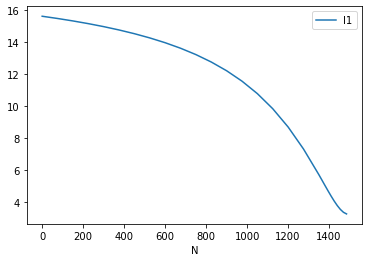

In [7]:
df.plot(x = 'N', y = 'I1')
plt.show()

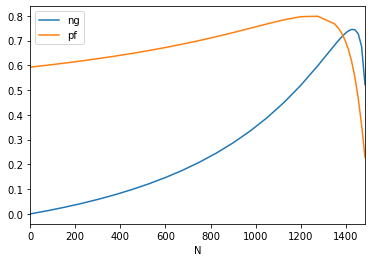

In [10]:
ax = plt.gca()
df.plot(x = 'N', y = 'ng', ax=ax)
df.plot(x = 'N', y = 'pf', ax=ax)
plt.show()

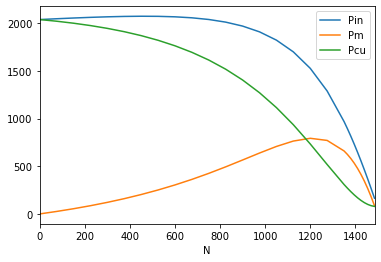

In [12]:
ax = plt.gca()
df.plot(x = 'N', y = 'Pin', ax=ax)
df.plot(x = 'N', y = 'Pm', ax=ax)
df.plot(x = 'N', y = 'Pcu', ax=ax)
plt.show()

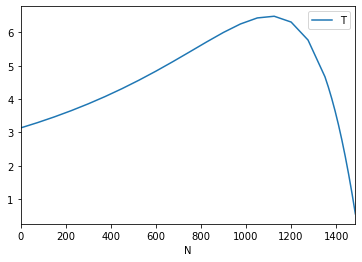

In [13]:
df.plot(x = 'N', y = 'T')
plt.show()